В качестве домашнего задания вам предлагается поработать над предсказанием погоды. Файл с данными вы найдете в соответствующей директории. Вам будет доступен датасет weather.csv, ПЕРВЫЕ 75% (shuffle = False) которого нужно взять для обучения, последние 25% - для тестирования.

Требуется построить 4 модели которые будут предсказывать целевую переменную <b>RainTomorrow</b> с помощью:

   1. логистической регрессии [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)
   
   2. метода ближайших соседей [sklearn.neighbors](https://scikit-learn.org/stable/modules/neighbors.html)
 
   3. Байесовского классификатора [sklearn.naive_bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)
   
   4. логистической регрессии реализованной самостоятельно

Затем следует сравнить результаты моделей (по качеству и времени выполнения) и сделать вывод о том, какая модель и с какими параметрами даёт лучшие результаты.

Не забывайте о том, что работа с признаками играет очень большую роль в построении хорошей модели.

Краткое описание данных:

    Date - Дата наблюдений
    Location - Название локации, в которой расположена метеорологическая станция
    MinTemp - Минимальная температура в градусах цельсия
    MaxTemp - Максимальная температура в градусах цельсия
    Rainfall - Количество осадков, зафиксированных за день в мм
    Evaporation - Так называемое "pan evaporation" класса А (мм) за 24 часа до 9 утра
    Sunshine - Число солнечных часов за день
    WindGustDir - направление самого сильного порыва ветра за последние 24 часа
    WindGustSpeed - скорость (км / ч) самого сильного порыва ветра за последние 24 часа
    WindDir9am - направление ветра в 9 утра

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import time
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import time
from tqdm import tqdm_notebook
plt.style.use('seaborn-v0_8-paper')

In [2]:
X = pd.read_csv('weather.csv')

In [3]:
X.head(10)

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [4]:
y = X.RainTomorrow.replace({'No':0, 'Yes': 1})

In [5]:
del X['RainTomorrow']

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     142193 non-null  int64  
 1   Date           142193 non-null  object 
 2   Location       142193 non-null  object 
 3   MinTemp        141556 non-null  float64
 4   MaxTemp        141871 non-null  float64
 5   Rainfall       140787 non-null  float64
 6   Evaporation    81350 non-null   float64
 7   Sunshine       74377 non-null   float64
 8   WindGustDir    132863 non-null  object 
 9   WindGustSpeed  132923 non-null  float64
 10  WindDir9am     132180 non-null  object 
 11  WindDir3pm     138415 non-null  object 
 12  WindSpeed9am   140845 non-null  float64
 13  WindSpeed3pm   139563 non-null  float64
 14  Humidity9am    140419 non-null  float64
 15  Humidity3pm    138583 non-null  float64
 16  Pressure9am    128179 non-null  float64
 17  Pressure3pm    128212 non-nul

# Предобработка данных

In [7]:
X.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
X.shape

(142193, 22)

In [9]:
print("Процент пропущенных значений\n")
print(X.isna().sum() / X.shape[0] * 100)

Процент пропущенных значений

Date              0.000000
Location          0.000000
MinTemp           0.447983
MaxTemp           0.226453
Rainfall          0.988797
Evaporation      42.789026
Sunshine         47.692924
WindGustDir       6.561504
WindGustSpeed     6.519308
WindDir9am        7.041838
WindDir3pm        2.656952
WindSpeed9am      0.948007
WindSpeed3pm      1.849599
Humidity9am       1.247600
Humidity3pm       2.538803
Pressure9am       9.855619
Pressure3pm       9.832411
Cloud9am         37.735332
Cloud3pm         40.152469
Temp9am           0.635756
Temp3pm           1.917113
RainToday         0.988797
dtype: float64


In [10]:
X.RainToday = X.RainToday.replace({'No':0, 'Yes': 1})

Для дальнейшей работы с категориальными признаками проанализируем числовые

In [11]:
num_features = []
for col in X.columns:
    if X[col].dtype == 'float64' and col != 'RainToday':
        num_features.append(col)

In [12]:
num_features

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

[]

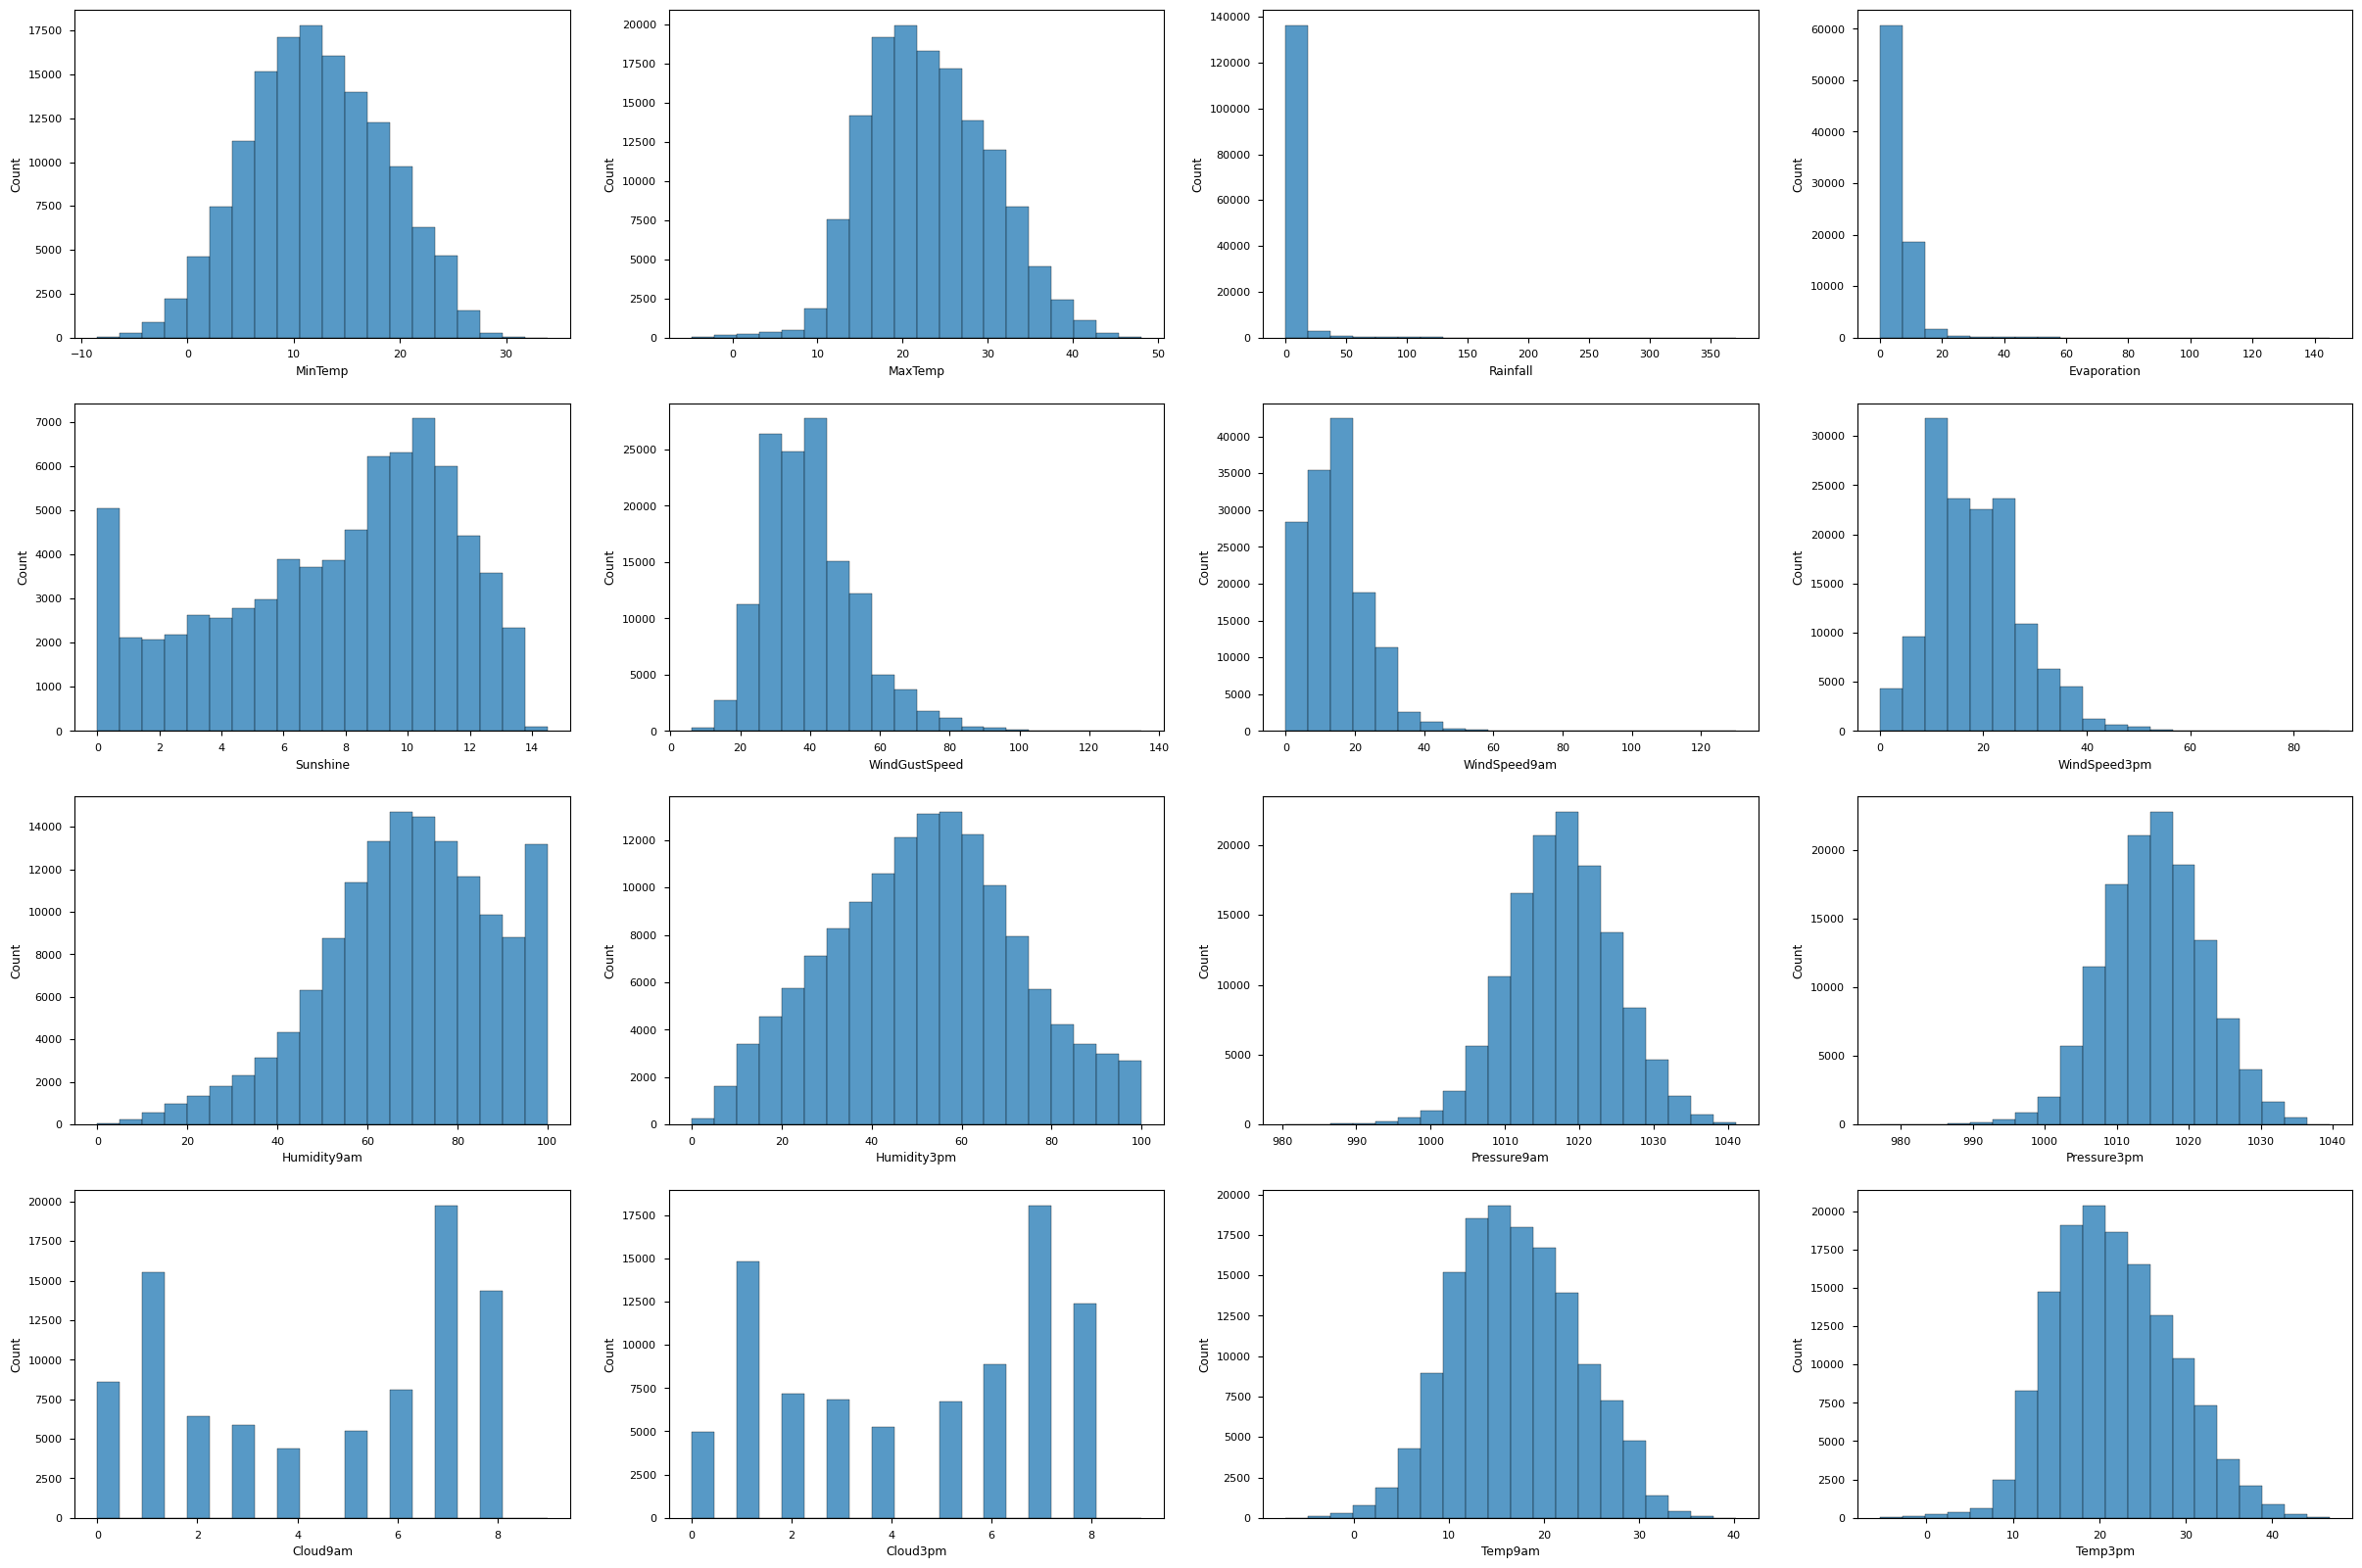

In [13]:
plt.figure(figsize=(30, 20))

for i, col in enumerate(num_features):
    plt.subplot(4, 4, i+1)
    sns.histplot(X[col], bins=20)
    
plt.plot()

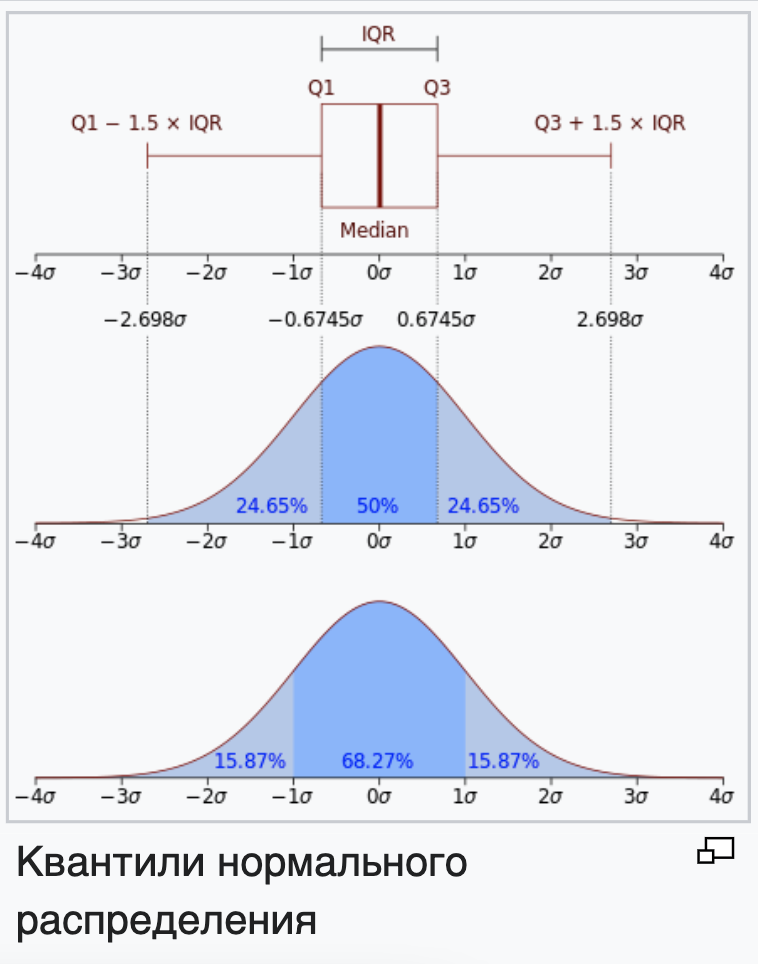

In [14]:
def deleteOuts(df, col):
    IQR = X[col].quantile(0.75) - X[col].quantile(0.25)
    left = 0
    right = X[col].quantile(0.75) + 3 * IQR
    index = df[df[col] >= right].index
    index.append(df[df[col] <= left].index)
    df.drop(index, inplace=True)
    y.drop(index, inplace=True)

In [15]:
deleteOuts(X, "Rainfall")
deleteOuts(X, "Evaporation")
deleteOuts(X, "WindSpeed9am")
deleteOuts(X, "WindSpeed3pm")

[]

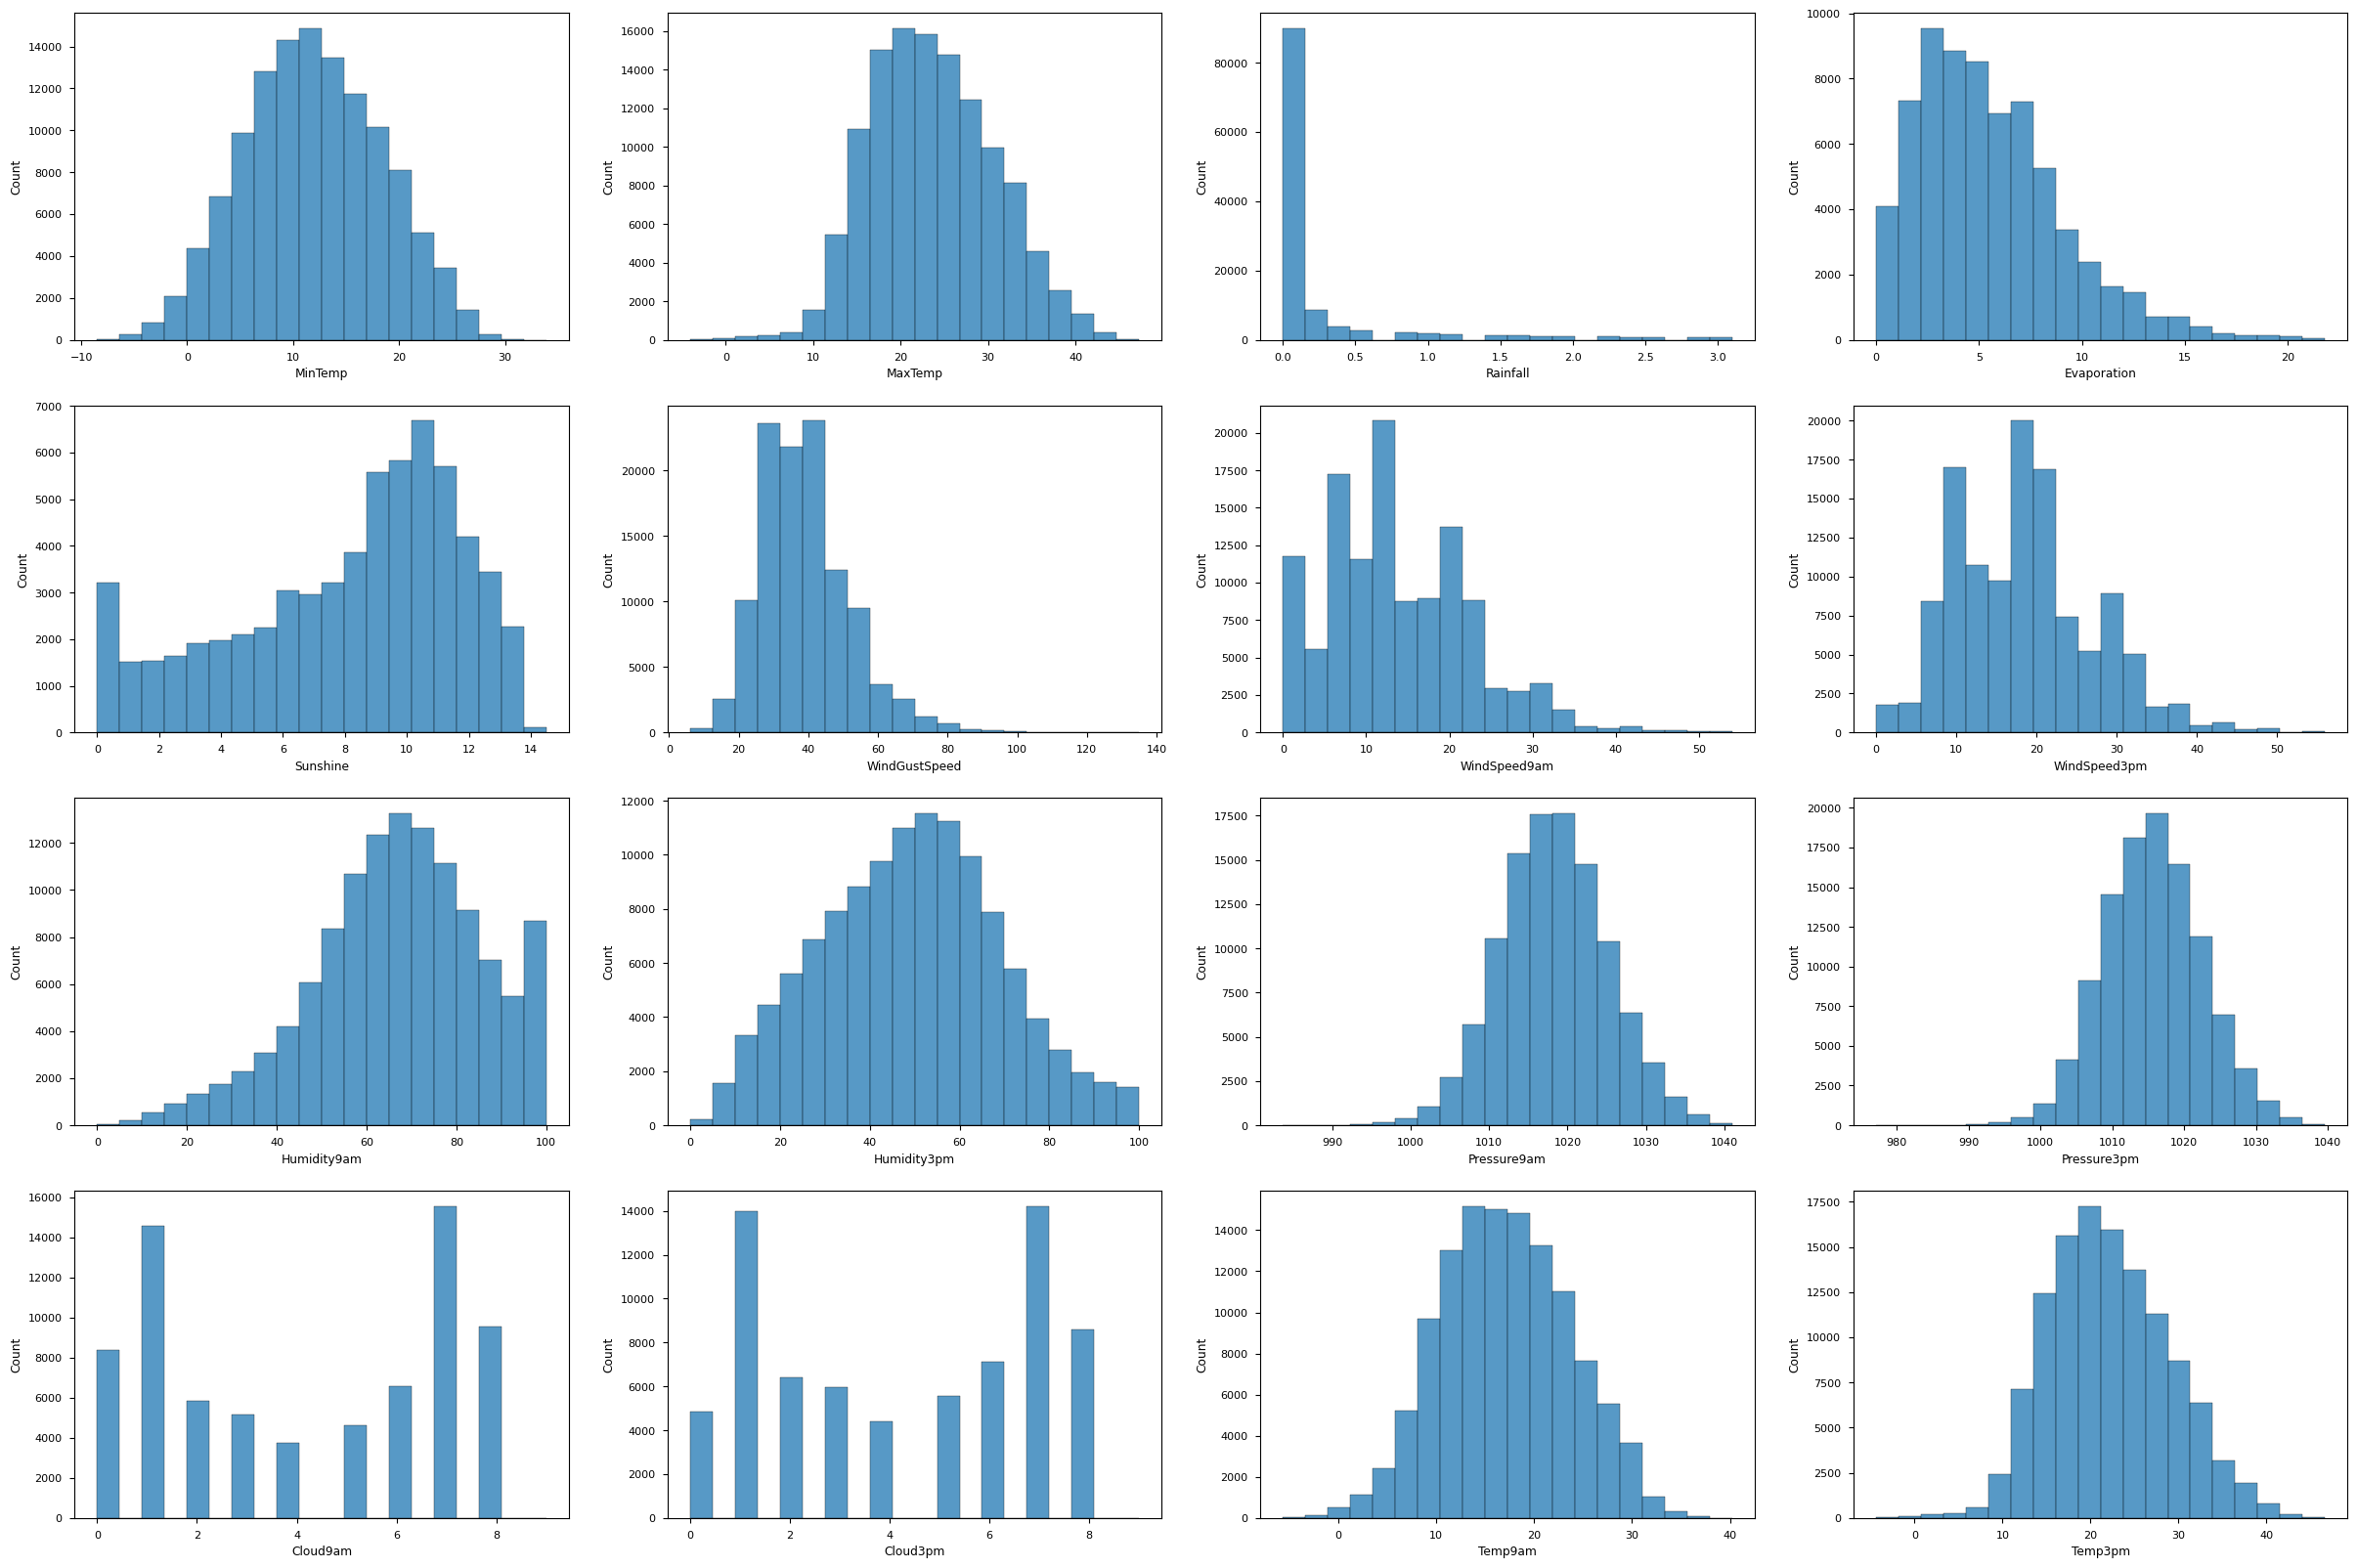

In [16]:
plt.figure(figsize=(30, 20))

for i, col in enumerate(num_features):
    plt.subplot(4, 4, i+1)
    sns.histplot(X[col], bins=20)
    
plt.plot()

Теперь в данных выбросов нет

In [17]:
print("Процент пропущенных значений\n")
print(X.isna().sum() / X.shape[0] * 100)

Процент пропущенных значений

Date              0.000000
Location          0.000000
MinTemp           0.465456
MaxTemp           0.232313
Rainfall          1.164055
Evaporation      42.646046
Sunshine         47.678114
WindGustDir       6.342977
WindGustSpeed     6.308130
WindDir9am        7.385067
WindDir3pm        2.592780
WindSpeed9am      0.977374
WindSpeed3pm      1.808723
Humidity9am       1.206369
Humidity3pm       2.455881
Pressure9am       9.905664
Pressure3pm       9.879944
Cloud9am         38.578908
Cloud3pm         40.994964
Temp9am           0.621438
Temp3pm           1.851038
RainToday         1.164055
dtype: float64


In [18]:
X[num_features] = X[num_features].fillna(X[num_features].median())

In [19]:
print("Процент пропущенных значений\n")
print(X.isna().sum() / X.shape[0] * 100)

Процент пропущенных значений

Date             0.000000
Location         0.000000
MinTemp          0.000000
MaxTemp          0.000000
Rainfall         0.000000
Evaporation      0.000000
Sunshine         0.000000
WindGustDir      6.342977
WindGustSpeed    0.000000
WindDir9am       7.385067
WindDir3pm       2.592780
WindSpeed9am     0.000000
WindSpeed3pm     0.000000
Humidity9am      0.000000
Humidity3pm      0.000000
Pressure9am      0.000000
Pressure3pm      0.000000
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.000000
Temp3pm          0.000000
RainToday        1.164055
dtype: float64


Для кодирования Location используем OHE

In [20]:
for city in X.Location.unique():
    X[city] = (X.Location == city).astype(int).values

In [21]:
X.drop('Location', axis=1, inplace=True)

Date преобразуем в три столбца Year Month Day

In [22]:
X.Date = pd.to_datetime(X.Date)

X['Year'] = X.Date.dt.year
X['Month'] = X.Date.dt.month
X['Day'] = X.Date.dt.day

X.drop('Date', axis=1, inplace=True)

In [23]:
WindGust_col = ["WindGustDir", "WindDir9am", "WindDir3pm"]

for col in WindGust_col:
    print(f"Уникальные элементы в {col}:", X[col].unique())

Уникальные элементы в WindGustDir: ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'ENE' 'SSE' 'S' 'SW' 'NW' 'SE' 'ESE'
 nan 'E' 'SSW']
Уникальные элементы в WindDir9am: ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'ESE' 'E' 'N' 'NW'
 'WSW' 'WNW' 'NNE']
Уникальные элементы в WindDir3pm: ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SE' 'N' 'SW' 'SSW' 'S'
 'NNE' nan 'NE']


Преобразуем эти три колонки методом OHE

In [24]:
for col in WindGust_col:
    for WindGust in X[col].unique():
        X[f'{col}_{WindGust}'] = (X[col] == WindGust).astype(int).values

In [25]:
for col in WindGust_col:
    X.drop(col, axis=1, inplace=True)

In [26]:
X.drop(["WindDir3pm_nan", "WindDir9am_nan", "WindGustDir_nan"], axis=1, inplace=True)

In [27]:
X.RainToday = X.RainToday.fillna(X.RainToday.median())

In [28]:
print("Процент пропущенных значений\n")
print(sum(list(X.isna().sum() / X.shape[0] * 100)))

Процент пропущенных значений

0.0


In [29]:
X.shape

(120527, 117)

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=False, random_state=2024)

In [31]:
results = pd.DataFrame()
fit_time = []
predict_time = []
score = []

# sklearn логистическая регрессия

In [32]:
from sklearn.metrics import classification_report, f1_score

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scale = pd.DataFrame(scaler.fit_transform(X_train))

X_test_scale = pd.DataFrame(scaler.transform(X_test))

In [34]:
from sklearn.linear_model import LogisticRegression

sk_lr = LogisticRegression(class_weight="balanced", random_state=2024,
                          max_iter=100, n_jobs=-1)

In [35]:
start_time = time.time()
sk_lr.fit(X_train_scale, y_train)
end_time = time.time()

In [36]:
fit_time.append(end_time - start_time)

In [37]:
y_train_pred = sk_lr.predict(X_train_scale)

start_time = time.time()
y_test_pred = sk_lr.predict(X_test_scale)
end_time = time.time()

print("train report\n", classification_report(y_train, y_train_pred))

print("test report\n", classification_report(y_test, y_test_pred))
predict_time.append(end_time - start_time)
score.append(f1_score(y_test, y_test_pred, average='weighted'))

train report
               precision    recall  f1-score   support

           0       0.94      0.78      0.85     74374
           1       0.43      0.75      0.55     16021

    accuracy                           0.78     90395
   macro avg       0.68      0.77      0.70     90395
weighted avg       0.85      0.78      0.80     90395

test report
               precision    recall  f1-score   support

           0       0.94      0.82      0.88     25314
           1       0.43      0.72      0.54      4818

    accuracy                           0.80     30132
   macro avg       0.69      0.77      0.71     30132
weighted avg       0.86      0.80      0.82     30132



# sklearn knn

In [38]:
from sklearn.neighbors import KNeighborsClassifier

sk_knn = KNeighborsClassifier(n_neighbors=10, n_jobs=-1)

In [39]:
start_time = time.time()
sk_knn.fit(X_train, y_train)
end_time = time.time()

In [40]:
fit_time.append(end_time - start_time)

In [41]:
y_train_pred = sk_knn.predict(X_train)
start_time = time.time()
y_test_pred = sk_knn.predict(X_test)
end_time = time.time()

print("train report\n", classification_report(y_train, y_train_pred))

print("test report\n", classification_report(y_test, y_test_pred))
predict_time.append(end_time - start_time)
score.append(f1_score(y_test, y_test_pred, average='weighted'))

train report
               precision    recall  f1-score   support

           0       0.88      0.98      0.93     74374
           1       0.81      0.35      0.49     16021

    accuracy                           0.87     90395
   macro avg       0.84      0.67      0.71     90395
weighted avg       0.86      0.87      0.85     90395

test report
               precision    recall  f1-score   support

           0       0.88      0.98      0.93     25314
           1       0.72      0.27      0.40      4818

    accuracy                           0.87     30132
   macro avg       0.80      0.63      0.66     30132
weighted avg       0.85      0.87      0.84     30132



# sklearn Байесовский классификатор

In [42]:
from sklearn.naive_bayes import GaussianNB

sk_nb = GaussianNB()

In [43]:
start_time = time.time()
sk_nb.fit(X_train_scale, y_train)
end_time = time.time()

In [44]:
fit_time.append(end_time - start_time)

In [45]:
y_train_pred = sk_nb.predict(X_train_scale)

start_time = time.time()
y_test_pred = sk_nb.predict(X_test_scale)
end_time = time.time()

print("train report\n", classification_report(y_train, y_train_pred))

print("test report\n", classification_report(y_test, y_test_pred))
predict_time.append(end_time - start_time)
score.append(f1_score(y_test, y_test_pred, average='weighted'))

train report
               precision    recall  f1-score   support

           0       0.89      0.70      0.78     74374
           1       0.30      0.61      0.41     16021

    accuracy                           0.68     90395
   macro avg       0.60      0.66      0.60     90395
weighted avg       0.79      0.68      0.72     90395

test report
               precision    recall  f1-score   support

           0       0.93      0.74      0.82     25314
           1       0.34      0.70      0.45      4818

    accuracy                           0.73     30132
   macro avg       0.63      0.72      0.64     30132
weighted avg       0.83      0.73      0.76     30132



# Реализация логистической регрессии
__Логистическая регрессия__

$$p(y|x) = a(x, \theta) = \sigma(\langle x, \theta \rangle) = \frac{1}{1 + \exp(-\langle \theta, x_i \rangle)}$$

In [46]:
theta = np.array([1, 2, 3])

X =  np.array([[ 1,  1, 1],
               [-1, -2, 1],
               [-1, -2, 2],
               [-2, -2, -3]
              ])

y = np.array([1, 1, 0, 0])

In [47]:
def probability(theta, X):
    result = 1 / (1 + np.exp(- X.dot(theta)))
    return result
prob = probability(theta, X)


assert type(prob) == np.ndarray, 'Возвращается неверный тип'
assert prob.shape == (X.shape[0],), 'Неверный размер массива'
assert (prob.round(3) == [0.998, 0.119, 0.731, 0.]).all(), 'Функция считается неверно'

Функция предсказания метки класса, получает на вход вероятности принадлежности к классу 1 и выдает метки классов $y \in \{0, 1\}$

In [48]:
def binary_class_prediction(theta, X, threshold =.5):
    prob =  probability(theta, X)
    result = []
    for p in prob:
        if p > threshold:
            result.append(1)
        else:
            result.append(0)
    return np.array(result)

y_pred = binary_class_prediction(theta, X)


assert type(y_pred) == np.ndarray, 'Возвращается неверный тип'
assert y_pred.shape == (X.shape[0],), 'Неверный размер массива'
assert min(y_pred) == 0, 'Функция считается неверно'
assert max(y_pred) == 1, 'Функция считается неверно'

__Функционал качества логистической регрессии__

Запишем правдободовие выборки для меток класса $y \in \{+1, -1\}$ 

$$Likelihood(a, X^\ell) = \prod_{i = 1}^{\ell} a(x_i,\theta)^{[y_i = +1]} (1 - a(x_i, \theta))^{[y_i = -1]} → \operatorname*{max}_{\theta}$$ 

Прологарифмируем правдоподобие выборки и перейдем к задаче минимизации:

$$Q(a, X^\ell) =     -\sum_{i = 1}^{\ell} 
        [y_i = +1] \log a(x_i, \theta)
        +
        [y_i = -1] \log (1 - a(x_i, \theta)) \to \operatorname*{min}_{\theta}$$ 
        
Подставим $a(x, \theta)$ в функцинал качества:

$$ Q(a, X^\ell) = -\sum_{i = 1}^{\ell} \left(
    [y_i = +1]
    \log \frac{1}{1 + \exp(-\langle \theta, x_i \rangle)}
    +
    [y_i = -1]
    \log \frac{\exp(-\langle \theta, x_i \rangle)}{1 + \exp(-\langle \theta, x_i \rangle)}
\right)
=\\
=
-\sum_{i = 1}^{\ell} \left(
    [y_i = +1]
    \log \frac{1}{1 + \exp(-\langle \theta, x_i \rangle)}
    +
    [y_i = -1]
    \log \frac{1}{1 + \exp(\langle \theta, x_i \rangle)}
\right)
=\\
=
\sum_{i = 1}^{\ell}
    \log \left(
        1 + \exp(-y_i \langle \theta, x_i \rangle)
    \right) $$
    

Итоговый оптимизируемый функционал качества (logloss), записанный для меток классов $y \in \{+1, -1\}$ и усредненный по выборке

$$Q(a, X^\ell) = \frac{1}{\ell}\sum_{i = 1}^{\ell}
    \log \left(
        1 + \exp(-y_i \langle \theta, x_i \rangle)
    \right) \to \operatorname*{min}_{\theta}$$

Реализуем его в функции logloss:

In [49]:
def logloss(theta, X, y): 
    result = 1 / X.shape[0] * np.sum(np.log(1 + np.exp(- y * X.dot(theta))))
    return result

In [50]:
y = np.array([1, 1, -1, -1])
assert logloss(theta, X, y).round(3) == 0.861, 'Функция считается неверно'

__Алгоритм оптимизации функционала качества. Стохастический градиентный спуск__

<b>Вход: </b> Выборка $X^\ell$, темп обучения $h$

<b>Выход: </b> оптимальный вектор весов $\theta$

1.  Инициализировать веса $\theta$
2.  Инициализировать оценку функционала качества: $Q(a, X^\ell)$
3.  <b>Повторять</b>: 

    Выбрать случайным образом подвыборку объектов $X^{batch} =\{x_1, \dots,x_n \}$ из $X^{\ell}$
    
    Рассчитать градиент функционала качества: $\nabla Q(X^{batch}, \theta)$
    
    Обновить веса: $\theta := \theta - h\cdot \nabla Q(X^{batch}, \theta)$
       
    <b>Пока</b> значение $Q$ и/или веса $\theta$ не сойдутся   

Реализуем функцию рассчета градиента функционала качества

$$\frac{\partial Q(a, X^{batch}) }{\partial \theta_j}   = \frac{\partial \frac{1}{n}\sum_{i = 1}^{n}
    \log \left(
        1 + \exp(- y_i \langle \theta, x_i \rangle)
    \right)} {\partial \theta_j}  = \frac{1}{n}\sum_{i = 1}^{n}
     \frac {1}{
        1 + \exp(- y_i \langle \theta, x_i \rangle)} \cdot  \exp(- y_i \langle \theta, x_i \rangle) \cdot -y_i x_{ij}$$

Реализуйте рассчет градиента в матричном виде:

In [51]:
def gradient(theta, X, y):
    result = 1 / y.shape[0] * np.sum(np.exp(- y * X.dot(theta)) / (1 + np.exp(- y * X.dot(theta))) * (- X.T * y), axis=1)
    return result 

assert gradient(theta, X, y).shape == theta.shape, 'Неверный размер массива'

Функция обучения уже реализована

In [52]:
def fit(X, y, batch_size=10, h=0.05, iters=100, plot=True):

    # получаем размерности матрицы
    size, dim = X.shape

    # случайная начальная инициализация
    theta = np.random.uniform(size=dim)
    
    errors = []
    
    theta_history = theta
    colors = [plt.get_cmap('gist_rainbow')(i) for i in np.linspace(0,1,dim)]
    
    # plt 
    if plot:
        fig = plt.figure(figsize=(15, 10))
        ax1 = fig.add_subplot(221)
        ax2 = fig.add_subplot(222)
        ax3 = fig.add_subplot(212)
        fig.suptitle('Gradient descent')
        
        
    for _ in tqdm_notebook(range(iters)):  
        
        # берём случайный набор элементов
        batch = np.random.choice(size, batch_size, replace=False)
        X_batch = X[batch]
        y_batch = y[batch]

        # считаем производные
        grad = gradient(theta, X_batch, y_batch)
        
        assert type(grad) == np.ndarray, 'неверный тип'
        assert len(grad.shape) == 1, 'Необходимо вернуть одномерный вектор'
        assert grad.shape[0] == len(theta), 'длина вектора должна быть равной количеству весов'
        
        
        # Обновляем веса
        
        theta -= grad * h
        
        theta_history = np.vstack((theta_history, theta))
        
        # error
        loss = logloss(theta, X, y)
        errors.append(loss)
        
        if plot:
            ax1.clear()            
            ax1.scatter(range(dim), theta, label='Gradient solution')
            ax1.legend(loc="upper left")
            ax1.set_title('theta')
            ax1.set_ylabel(r'$\bar \beta$')
            ax1.set_xlabel('weight ID')
            
            
            ax2.plot(range(_+1), errors, 'g-')
            ax2.set_title('logloss')
            ax2.set_xlabel('itarations')
            
            ax3.plot(theta_history)
            ax3.set_title('update theta')
            ax3.set_ylabel('value')
            ax3.set_xlabel('itarations')
            time.sleep(0.05)
            fig.canvas.draw()   
            
    return theta

In [53]:
X, y = make_classification(n_samples=2000)

  0%|          | 0/100 [00:00<?, ?it/s]

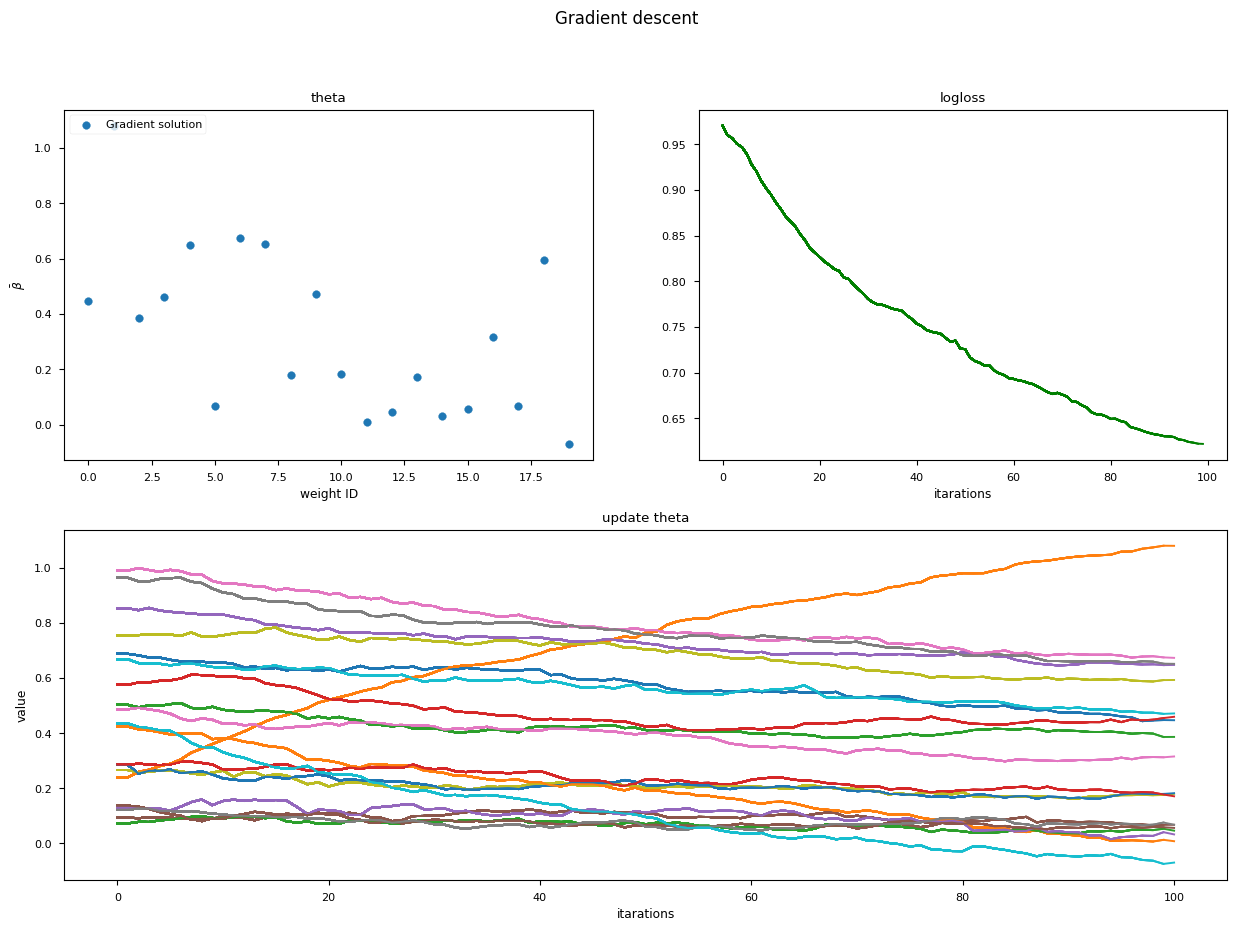

In [54]:
optimal_theta = fit(X, y)

In [55]:
y_pred = binary_class_prediction(optimal_theta, X)

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       997
           1       0.73      0.73      0.73      1003

    accuracy                           0.73      2000
   macro avg       0.73      0.73      0.73      2000
weighted avg       0.73      0.73      0.73      2000



# Собственная логистическая регрессия

  0%|          | 0/200 [00:00<?, ?it/s]

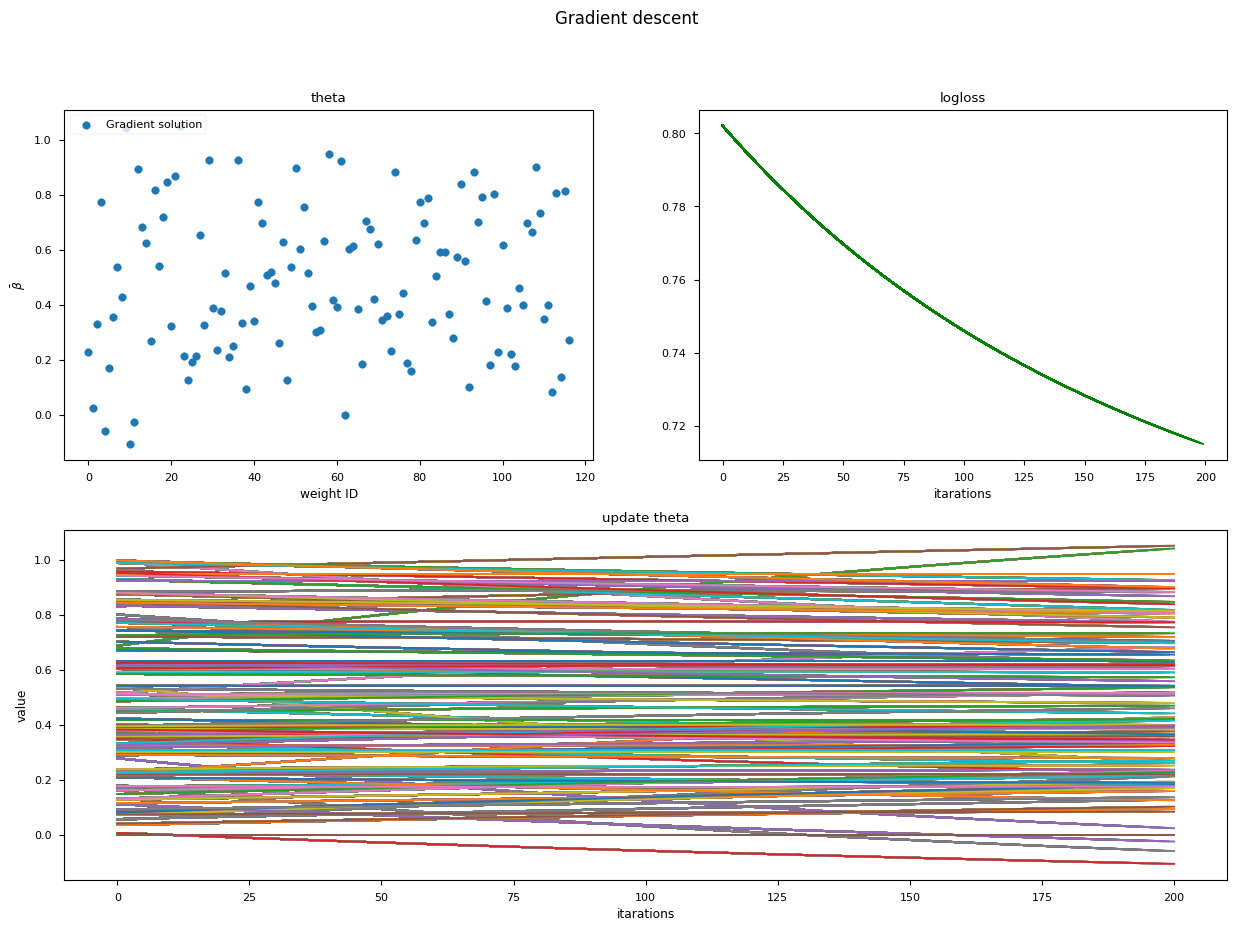

In [56]:
start_time = time.time()
optimal_theta = fit(np.array(X_train_scale), np.array(y_train), batch_size=80000, h=0.05, iters=200, plot=True)
end_time = time.time()
fit_time.append(end_time - start_time)

In [57]:
y_train_pred = binary_class_prediction(optimal_theta, np.array(X_train_scale), threshold=0.5)

start_time = time.time()
y_test_pred = binary_class_prediction(optimal_theta, np.array(X_test_scale), threshold=0.5)
end_time = time.time()

print("train report\n", classification_report(y_train, y_train_pred))
print("test report\n", classification_report(y_test, y_test_pred))
predict_time.append(end_time - start_time)
score.append(f1_score(y_test, y_test_pred, average='weighted'))

train report
               precision    recall  f1-score   support

           0       0.90      0.56      0.69     74374
           1       0.26      0.71      0.38     16021

    accuracy                           0.59     90395
   macro avg       0.58      0.64      0.54     90395
weighted avg       0.79      0.59      0.64     90395

test report
               precision    recall  f1-score   support

           0       0.89      0.79      0.84     25314
           1       0.30      0.47      0.37      4818

    accuracy                           0.74     30132
   macro avg       0.60      0.63      0.60     30132
weighted avg       0.79      0.74      0.76     30132



In [68]:
results["fit_time, s"] = fit_time
results["predict_time, s"] = predict_time
results["f1_score"] = score
results.index = ["sk_logreg", "sk_knn", "sk_naive", "logreg"]

In [69]:
results

,"fit_time, s","predict_time, s",f1_score
sk_logreg,3.633269,0.007208,0.822452
sk_knn,0.188886,8.929707,0.840560
sk_naive,0.250793,0.076046,0.763234
logreg,306.137352,0.087027,0.762605


Как видно, наилучший результат выдает метод ближайших соседей. Следующий по оценке - логистическая регрессия из sklearn.<br>
По времени испольнения написанный нами алогитм логистической регрессии работает в 100 раз медленнее библиотечной реализации